In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 데이터 읽기
med = pd.read_csv("c:/data/mva/medFactor.csv")
med.head(3)

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
0,20,16,52,10,24,23,19,20,23,29,67
1,24,16,52,7,27,16,16,15,31,33,59
2,19,21,57,18,22,23,16,19,42,40,61


In [2]:
# 기술통계량 구하기
med.describe()

,lung,muscle,liver,skeleton,kidneys,heart,step,stamina,stretch,blow,urine
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,19.960938,18.820312,54.695312,12.867188,25.640625,23.179688,16.171875,15.867188,38.812500,33.539062,66.906250
std,4.464034,4.088458,7.428990,2.986508,3.805786,4.159106,2.478599,2.651314,7.798395,4.097055,12.565067
min,4.000000,9.000000,26.000000,3.000000,16.000000,11.000000,4.000000,7.000000,16.000000,17.000000,9.000000
25%,17.000000,16.000000,50.750000,11.000000,23.000000,22.000000,15.000000,14.000000,34.000000,32.000000,59.000000
50%,20.000000,19.000000,55.000000,13.000000,26.000000,23.000000,17.000000,16.000000,40.000000,34.000000,67.000000
75%,23.000000,22.000000,60.250000,15.000000,29.000000,25.000000,18.000000,18.000000,45.000000,36.000000,76.000000
max,29.000000,28.000000,69.000000,19.000000,32.000000,56.000000,20.000000,20.000000,51.000000,41.000000,93.000000


In [3]:
# 인자분석 적정성 검정
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(med)
chi_square_value, p_value
# p_value가 매우 작은 값을 가지므로 귀무가설 기각, 통계적으로 유의

(341.2089876475221, 6.4362758343486854e-43)

In [4]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(med)
kmo_model
# 결과 값이 0.68로 0.6보다 크므로 인자분석이 가능

0.6840306201730828

In [15]:
# 초기 인자분석
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
# help(FactorAnalyzer): 클래스 코드 보기
fa.fit(med)
# 고윳값 구하기
ev, v = fa.get_eigenvalues()
ev

array([3.37918137, 1.48277065, 1.25063015, 0.98047706, 0.7688022 ,
       0.73305114, 0.64039936, 0.62219335, 0.52837181, 0.35193006,
       0.26219284])

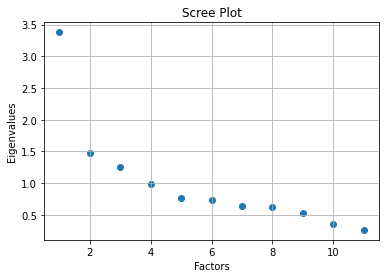

In [16]:
# 스크리 그림 그리기
plt.scatter(range(1, med.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

In [18]:
# 인자분석 – varimax 인자회전
fa_varimax = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal')
fa_varimax.fit(med)
# 인자적재계수
np.round(fa_varimax.loadings_, 3)

array([[ 0.659,  0.123,  0.16 ],
       [ 0.111, -0.086,  0.785],
       [ 0.783,  0.127,  0.17 ],
       [ 0.185,  0.285,  0.763],
       [ 0.731,  0.23 , -0.135],
       [ 0.646, -0.107,  0.185],
       [ 0.486,  0.48 ,  0.102],
       [ 0.016,  0.62 ,  0.289],
       [ 0.18 ,  0.652,  0.336],
       [ 0.264,  0.699, -0.04 ],
       [-0.066,  0.649, -0.277]])

In [21]:
# 인자 공통성(communality)
np.round(fa_varimax.get_communalities(), 3)

array([0.475, 0.636, 0.658, 0.698, 0.606, 0.463, 0.478, 0.468, 0.57 ,
       0.56 , 0.502])

In [5]:
# 인자고유분산: 1-공통성
np.round(fa_varimax.get_uniquenesses(), 3)

NameError: name 'fa_varimax' is not defined

In [ ]:
# 인자분산
np.round(fa_varimax.get_factor_variance(), 3)

In [ ]:
# Oblimin 인자회전
fa_obm = FactorAnalyzer(n_factors=3, rotation='oblimin', method='principal')
fa_obm.fit(med)
# 인자적재계수
fa_obm.loadings_

In [ ]:
# 인자 공통성(communality)
fa_obm.get_communalities()

In [ ]:
# 인자고유분산: 1-공통성
fa_obm.get_uniquenesses()

In [ ]:
# 인자분산
fa_obm.get_factor_variance()